In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from keras.layers import Dense,Dropout,Input,BatchNormalization,Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [8]:
df = pd.read_csv('../Datasets/ML/house_pricing_data.csv')

df["date"] = pd.to_datetime(df["date"])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df.drop(columns=['date'], inplace=True)
df.drop(columns=['month'], inplace=True)
print(df.shape)
df.columns

FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/ML/house_pricing_data.csv'

In [ ]:
df.select_dtypes(exclude=object)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,quarter,month_sin,month_cos
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,2014,2,0.5,-0.866025
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2014,2,0.5,-0.866025
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2014,2,0.5,-0.866025
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2014,2,0.5,-0.866025
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,2014,2,0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,2014,3,-0.5,-0.866025
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,2014,3,-0.5,-0.866025
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,2014,3,-0.5,-0.866025
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2014,3,-0.5,-0.866025


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,quarter,month_sin,month_cos
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,4.600000e+03,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0,2.141957,1.211957e-01,-0.929489
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,0.349043,3.419256e-01,0.066902
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,2.000000,-5.000000e-01,-1.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,2.000000,1.224647e-16,-1.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,2.000000,1.224647e-16,-0.866025
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,2.000000,5.000000e-01,-0.866025
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0,3.000000,5.000000e-01,-0.866025


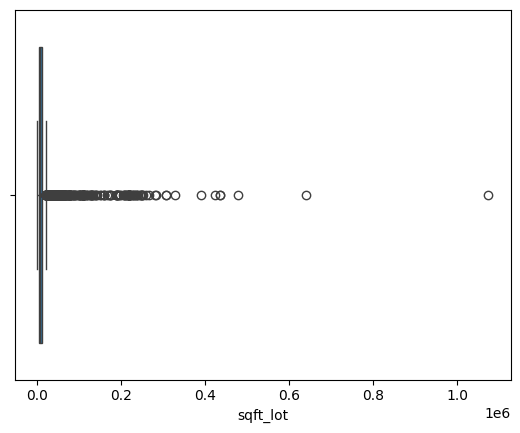

In [ ]:
from seaborn import boxplot
boxplot(df,x="sqft_lot")
sc2 = StandardScaler()
df1 = pd.DataFrame(sc2.fit_transform(pd.DataFrame(df["sqft_lot"])))
df1.columns = ["col1"]
df1.describe()
df.drop(df1[df1["col1"] > 3].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

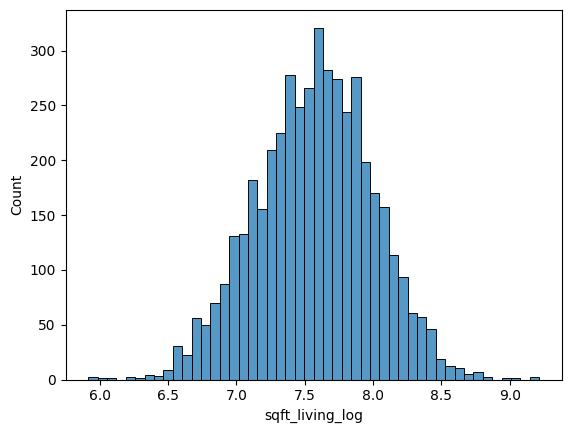

In [ ]:
from seaborn import histplot
import numpy as np
df["sqft_living_log"] = np.log1p(df["sqft_living"])
histplot(df,x="sqft_living_log")
df.drop("sqft_living",axis=1,inplace=True)

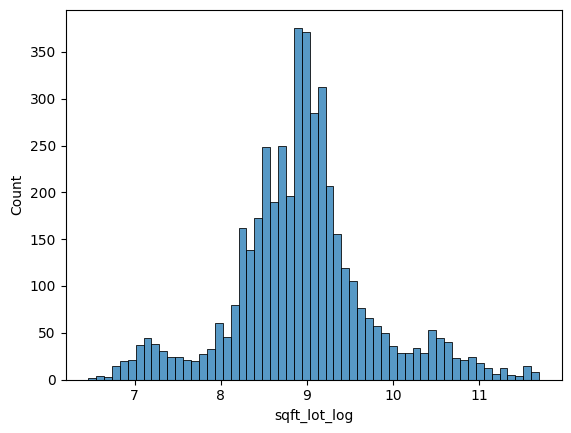

In [ ]:
df["sqft_lot_log"] = np.log1p(df["sqft_lot"])
histplot(df,x="sqft_lot_log")
df.drop("sqft_lot",axis=1,inplace=True)

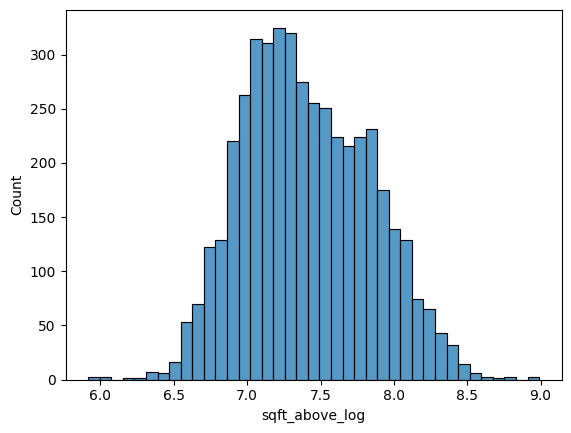

In [ ]:
df["sqft_above_log"] = np.log1p(df["sqft_above"])
histplot(df,x="sqft_above_log")
df.drop("sqft_above",axis=1,inplace=True)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'street',
       'city', 'statezip', 'country', 'year', 'quarter', 'month_sin',
       'month_cos', 'sqft_living_log', 'sqft_lot_log', 'sqft_above_log'],
      dtype='object')

np.float64(0.006403881827872833)

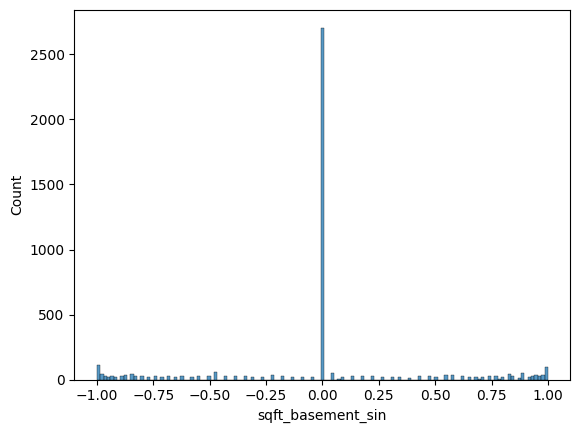

In [ ]:
df["sqft_basement_sin"] = np.sin(df["sqft_basement"])
histplot(df,x="sqft_basement_sin")
df.drop("sqft_basement",axis=1,inplace=True)
df["sqft_basement_sin"].skew()

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip',
       'country', 'year', 'quarter', 'month_sin', 'month_cos',
       'sqft_living_log', 'sqft_lot_log', 'sqft_above_log',
       'sqft_basement_sin'],
      dtype='object')

In [ ]:
df.drop("price",axis=1).select_dtypes(include=object)


,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...
4517,501 N 143rd St,Seattle,WA 98133,USA
4518,14855 SE 10th Pl,Bellevue,WA 98007,USA
4519,759 Ilwaco Pl NE,Renton,WA 98059,USA
4520,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
for col in df.select_dtypes(include=object):
    en = LabelEncoder()
    df[col] = en.fit_transform(df[col])

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size=0.2, random_state=42
)

sc1 = StandardScaler()
y_train = sc1.fit_transform(pd.DataFrame(y_train))
y_test = sc1.fit_transform(pd.DataFrame(y_test))

Y = df["price"]
cat_col = ["waterfront","view","condition","street","city","statezip","country"]
num_col = ['bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot_log', 'floors',
         'sqft_above_log', 'sqft_basement_sin',
       'yr_built', 'yr_renovated',
       'year', 'quarter']

sc = StandardScaler()
X_train[num_col] = sc.fit_transform(X_train[num_col])
X_test[num_col] = sc.transform(X_test[num_col])

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
model = keras.Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=64, activation='relu', ))
model.add(layers.Dense(units=4, activation='relu'))
model.add(layers.Dense(units=1, activation='linear'))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
y_pred = model.predict(X_test)
y_pred = sc1.inverse_transform(y_pred)
y_test = sc1.inverse_transform(y_test)
r2_score(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
# X = df.drop('price', axis = 1)
# y = df['price']

# X_train, X_test, y_train, y_test = train_test_split(
#     X , y, test_size=0.2, random_state=42
# )

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = sc1.inverse_transform(y_pred)
y_test = sc1.inverse_transform(y_test)
r2_score(y_test,y_pred)

-0.04519020102920113